In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# Load the data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

print(X_train.shape)
print(X_test.shape)

# Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)))

(426, 30)
(143, 30)
Test set accuracy with Logistic Regression: 0.94


c:\Users\lotop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


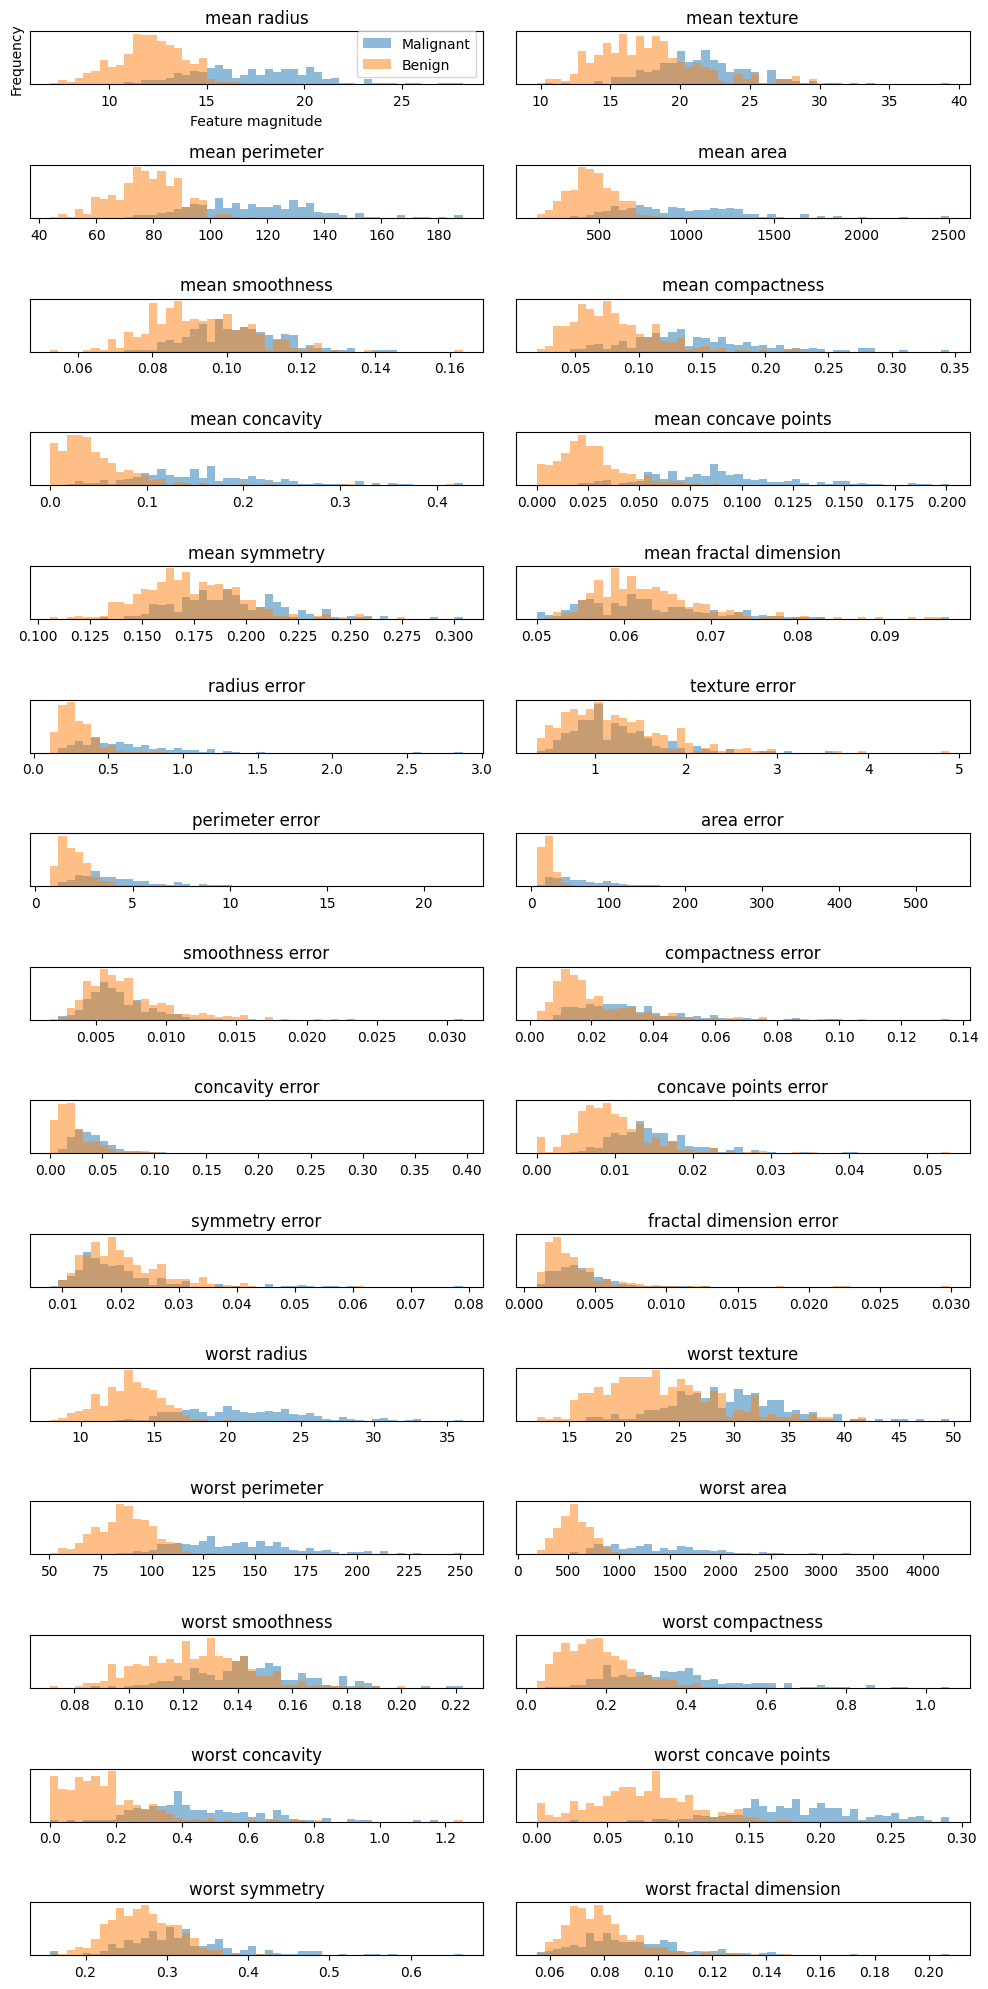

In [2]:
import pandas as pd

# Making a data frame
cancerpd = pd.DataFrame(cancer.data, columns=cancer.feature_names)

fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins =50)
    ax[i].hist(malignant[:,i], bins = bins, alpha = 0.5)
    ax[i].hist(benign[:,i], bins = bins, alpha = 0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["Malignant", "Benign"], loc ="best")
fig.tight_layout()
plt.show()

We see that for some of the features we can distinguish clearly the benign and malignant cases while for other features we cannot. This can point to us which features may be of greater interest when we wish to classify a benign or not benign tumour.

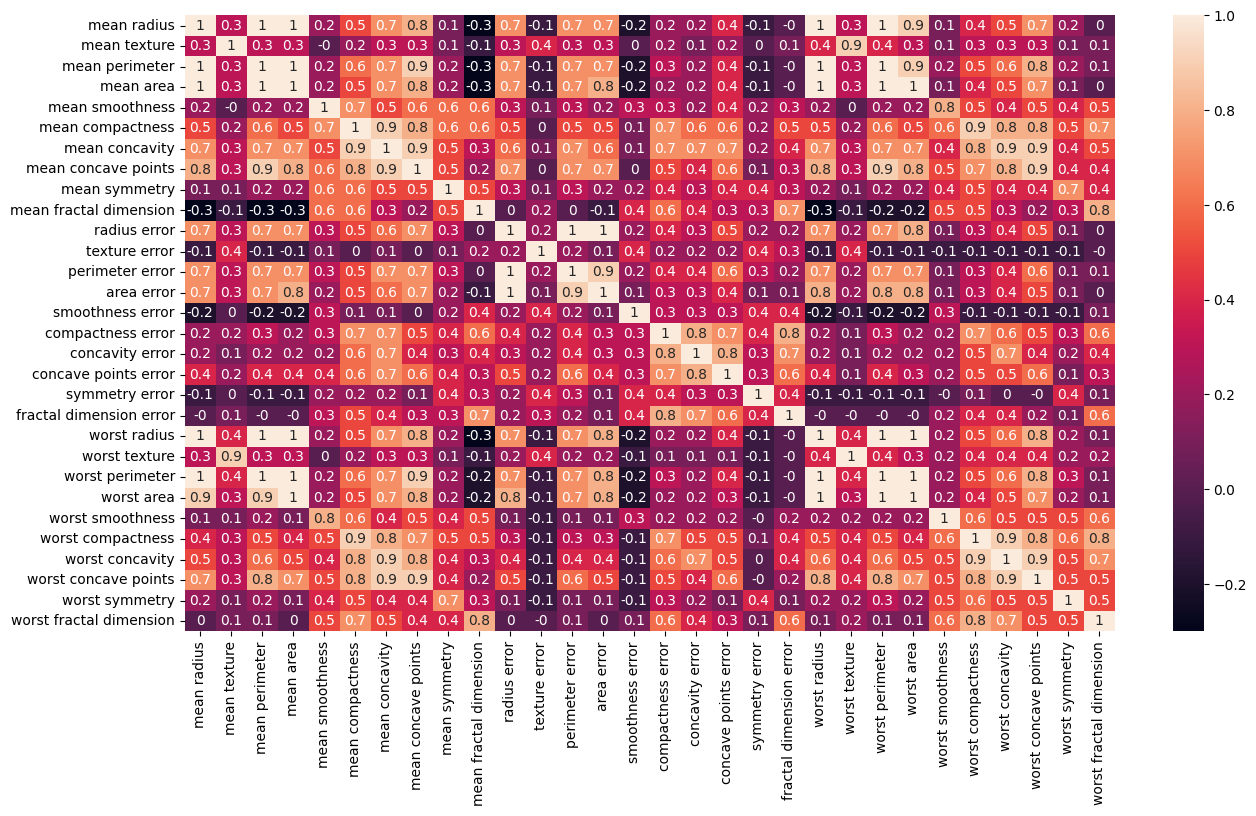

In [3]:
import seaborn as sns

correlation_matrix = cancerpd.corr().round(1)

# Use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [4]:
import numpy as np
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.beta_logreg = None
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def GDfit(self, X, y):
        n_data, num_features = X.shape
        self.beta_logreg = np.zeros(num_features)
        for _ in range(self.num_iterations):
            linear_model = X @ self.beta_logreg
            y_predicted = self.sigmoid(linear_model)
            # Gradient calculation
            gradient = (X.T @ (y_predicted - y))/n_data
            # Update beta_logreg
            self.beta_logreg -= self.learning_rate*gradient
    def predict(self, X):
        linear_model = X @ self.beta_logreg
        y_predicted = self.sigmoid(linear_model)
        return [1 if i >= 0.5 else 0 for i in y_predicted]
# Example usage
if __name__ == "__main__":
    # Sample data
    X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
    y = np.array([0, 0, 0, 1])  # This is an AND gate
    model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
    model.GDfit(X, y)
    predictions = model.predict(X)
    print("Predictions:", predictions)

Predictions: [1, 1, 1, 1]


## Project Analysis

In [5]:
# LIBRARIES 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from matplotlib.backends.backend_pdf import PdfPages # To save the generated plots as PDFs
import numpy as np

### Cost function definition

In our logistic regression implementation, the cost function we decided to use is the **binary cross-entropy cost function**, typically used for binary classification.

$$
J(\boldsymbol{\beta}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\boldsymbol{\beta}}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\boldsymbol{\beta}}(x^{(i)})) \right]
$$

where:
- $ h_{\boldsymbol{\beta}}(x^{(i)}) = \text{sigmoid}(X^{(i)}\boldsymbol{\beta}) $ is the probability output from the sigmoid function for a given sample $ X^{(i)} $.
- $ y^{(i)} $ is the true label (0 or 1) for sample $ i $.
- $ m $ is the batch size (or total number of samples in a full-batch approach).

### Gradient computation

To minimize this cost function with respect to $ \boldsymbol{\beta} $, we compute the partial derivatives of $ J(\boldsymbol{\beta}) $ with respect to $ \boldsymbol{\beta} $:

$$
\frac{\partial J}{\partial \boldsymbol{\beta}} = \frac{1}{m} X^T (h_{\boldsymbol{\beta}}(X) - y)
$$

where:
- $ h_{\boldsymbol{\beta}}(X) = \text{sigmoid}(X\boldsymbol{\beta}) $ (element-wise on each sample).
- $ (h_{\boldsymbol{\beta}}(X) - y) $ is the vector of errors between predicted probabilities and true labels.

### L2 regularization addition

When we add $L_2$ regularization to logistic regression, the cost function becomes:

$$
J(\boldsymbol{\beta}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\boldsymbol{\beta}}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\boldsymbol{\beta}}(x^{(i)})) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \beta_j^2
$$

where:
- $ \lambda $ is the regularization parameter that controls the strength of the regularization term (`l2_lambda` in our code implementation).
- $ \beta_j $ represents each weight in $ \boldsymbol{\beta} $ (except the bias term, which is usually not regularized).

The gradient of the cost function then becomes:

$$
\frac{\partial J}{\partial \boldsymbol{\beta}} = \frac{1}{m} X^T (h_{\boldsymbol{\beta}}(X) - y) + \frac{\lambda}{m} \boldsymbol{\beta}
$$

In [6]:
class LogisticRegressionSGD:
    """
    Logistic Regression classifier using Stochastic Gradient Descent (SGD) optimization.

    This class supports logistic regression with various features such as:
    - Mini-batch SGD with momentum
    - L2 regularization
    - Early stopping with patience
    - Hyperparameter analysis for tuning learning rate and regularization parameters

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The initial learning rate for gradient descent updates.
    num_iterations : int, default=1000
        The maximum number of training epochs.
    batch_size : int, default=32
        The number of samples per mini-batch.
    momentum : float, default=0.0
        The momentum factor for SGD updates.
    l2_lambda : float, default=0.0
        L2 regularization strength.
    patience : int, default=10
        Number of epochs with no improvement after which training will be stopped early.
    tol : float, default=1e-4
        Minimum improvement threshold for early stopping.
    verbose : bool, default=False
        If True, print training progress and debug information.

    Methods:
    --------
    - sigmoid(z): Computes the sigmoid function.
    - compute_loss(X, y): Computes the loss with L2 regularization.
    - SGDfit(X, y): Fits the model using SGD.
    - predict(X): Predicts class labels for samples in X.
    - plot_loss_history(): Plots the training loss history over epochs.
    - analyze_hyperparameters(X_train, y_train, X_test, y_test, learning_rates, regularization_terms, num_iterations):
      Tunes learning rate and regularization parameters, finding optimal settings based on test accuracy.
    """
    def __init__(self, learning_rate=0.01, num_iterations=1000, batch_size=32, momentum=0.0, l2_lambda=0.0, patience=10, tol=1e-4, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.batch_size = batch_size
        self.momentum = momentum
        self.l2_lambda = l2_lambda
        self.patience = patience  # Early stopping patience
        self.tol = tol  # Minimum improvement threshold for early stopping
        self.beta = None # Vector of weights for the logistic regression model
        self.verbose = verbose
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        y_pred = self.sigmoid(X @ self.beta)
        # Clip y_pred to avoid log(0) issues
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        if self.l2_lambda > 0:
            loss += (self.l2_lambda / 2) * np.sum(self.beta ** 2)
        return loss

    def SGDfit(self, X, y):
        samples, features = X.shape
        self.beta = np.random.randn(features, 1) * 0.01  # Small initialization
        velocity = np.zeros((features, 1))

        # Initialize best_loss to infinity to ensure any first epoch loss will be smaller, allowing it to update.
        best_loss = float('inf')  
        patience_counter = 0

        for epoch in range(self.num_iterations):
            # Shuffle data
            shuffled_indices = np.random.permutation(samples)
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices].reshape(-1, 1)

            # Loop over mini-batches
            for i in range(0, samples, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                # Compute predictions
                y_predicted = self.sigmoid(X_batch @ self.beta)

                # Compute the gradient with L2 regularization
                gradient = (X_batch.T @ (y_predicted - y_batch)) / self.batch_size
                if self.l2_lambda > 0:
                    gradient += self.l2_lambda * self.beta

                # Update velocity and beta with momentum
                velocity = self.momentum * velocity + self.learning_rate * gradient
                self.beta -= velocity

            # Calculate and check loss for early stopping
            current_loss = self.compute_loss(X, y)
            self.loss_history.append(current_loss)  # Track loss over epochs

            # Print loss every 100 epochs if verbose is True
            if self.verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}: Training Loss = {current_loss:.4f}")

            if current_loss < best_loss - self.tol:
                best_loss = current_loss
                patience_counter = 0  # Reset counter if improvement
            else:
                patience_counter += 1  # Increment counter if no significant improvement

            if patience_counter >= self.patience:
                print(f"Stopping early at epoch {epoch + 1}")
                break

    def predict(self, X):
        linear_model = X @ self.beta
        y_predicted = self.sigmoid(linear_model)
        return [1 if i >= 0.5 else 0 for i in y_predicted]

    def plot_loss_history(self):
        plt.plot(self.loss_history)
        plt.xlabel('Epochs')
        plt.ylabel('Training Loss')
        plt.title('Training Loss over Epochs')
        plt.show()

    # MAIN FUNCTION USED FOR THE TUNING OF THE HYPERPARAMETERS
    def analyze_hyperparameters(
    self,
    X_train,
    y_train,
    X_test,
    y_test,
    learning_rates=None,
    regularization_terms=None,
    num_iterations=5000,
    save_to_pdf = True
):
        """
         Perform grid search to optimize learning rate and regularization parameters, 
         with an option to save plots as separate PDF files.

        Parameters:
        -----------
        X_train, y_train : np.ndarray
            Training data and labels.
        X_test, y_test : np.ndarray
            Test data and labels.
        learning_rates : array-like, optional
            Array of learning rates to test. Defaults to values between 10^-5 and 10^1.
        regularization_terms : array-like, optional
            Array of regularization terms (λ values) to test. Defaults to values between 10^-4 and 10^1.
        num_iterations : int, optional
            Number of iterations for each model training, default is 5000.
            
        Returns:
        --------
        tuple : (best_learning_rate, best_lambda, best_accuracy, best_model)
            - best_learning_rate (float): The optimal learning rate based on highest test accuracy.
            - best_lambda (float): The optimal regularization term (λ) based on highest test accuracy.
            - best_accuracy (float): The highest test accuracy achieved with the optimal parameters.
            - best_model (LogisticRegressionSGD): The model instance trained with the best parameters.
        """

        # Scale the training and test data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Default values if none provided
        if learning_rates is None:
            learning_rates = np.logspace(-5, 1, 70)
        if regularization_terms is None:
            regularization_terms = np.logspace(-4, 1, 50)
        
        # Step 1: Find the best learning rate
        lr_accuracies = []
        best_learning_rate = None
        best_accuracy = 0
        best_model = None
        
        print("Analyzing learning rates...")
        for lr in learning_rates:
            model = LogisticRegressionSGD(
                learning_rate=lr,
                num_iterations=num_iterations,
                batch_size=self.batch_size,
                momentum=self.momentum,
                l2_lambda=0.01,  # Small regularization during LR search
                patience=self.patience,
                tol=self.tol
            )
            model.SGDfit(X_train, y_train)
            
            predictions = model.predict(X_test)
            accuracy = np.mean(predictions == y_test)
            lr_accuracies.append(accuracy)
            
            # Track best model and learning rate based on accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_learning_rate = lr
                best_model = model
            
            if self.verbose:
                print(f"Learning rate: {lr:.6f}, Test accuracy: {accuracy:.4f}")

        # Plot and save learning rate analysis
        fig_lr, ax1 = plt.subplots(figsize=(7, 6))
        ax1.plot(learning_rates, lr_accuracies, marker='o', markersize=3)
        ax1.set_xscale('log')
        ax1.set_xlabel('Learning Rate')
        ax1.set_ylabel('Test Accuracy')
        ax1.set_title('Effect of Learning Rate on Test Accuracy')
        ax1.grid(True)

        if save_to_pdf:
            fig_lr.savefig("learning_rates_analysis.pdf", format='pdf')
        
        print(f'\nBest learning rate found: {best_learning_rate:.6f} '
            f'(Accuracy: {best_accuracy:.4f})')
        print('-' * 60)
        
        # Step 2: Analyze regularization with best learning rate
        reg_accuracies = []
        reg_best_accuracy = best_accuracy
        reg_best_lambda = 0.0
        
        print("\nAnalyzing regularization terms...")
        for reg in regularization_terms:
            model = LogisticRegressionSGD(
                learning_rate=best_learning_rate,
                num_iterations=num_iterations,
                batch_size=self.batch_size,
                momentum=self.momentum,
                l2_lambda=reg,
                patience=self.patience,
                tol=self.tol
            )
            model.SGDfit(X_train, y_train)
            
            predictions = model.predict(X_test)
            accuracy = np.mean(predictions == y_test)
            reg_accuracies.append(accuracy)
            
            # Track best model and lambda based on accuracy
            if accuracy > reg_best_accuracy:
                reg_best_accuracy = accuracy
                reg_best_lambda = reg
                best_model = model  # Update best model with best regularization
            
            if self.verbose:
                print(f"Lambda: {reg:.6f}, Test accuracy: {accuracy:.4f}")
        
        # Plot and save regularization analysis
        fig_reg, ax2 = plt.subplots(figsize=(7, 6))
        ax2.plot(regularization_terms, reg_accuracies, marker='o', markersize=3)
        ax2.set_xscale('log')
        ax2.set_xlabel('L2 Regularization (λ)')
        ax2.set_ylabel('Test Accuracy')
        ax2.set_title('Effect of Regularization on Test Accuracy')
        ax2.grid(True)

        if save_to_pdf:
            fig_reg.savefig("regularization_analysis.pdf", format='pdf')

        plt.show()

        print(f'\nBest regularization term found: {reg_best_lambda:.6f} '
            f'(Accuracy: {reg_best_accuracy:.4f})')
        
        return best_learning_rate, reg_best_lambda, reg_best_accuracy, best_model

## Logistic regression implementation for the Wisconsin Breast Cancer dataset

We finally apply the created logistic regression class to the dataset we want to analyze ([Wisconsin Breat Cancer Data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)). In order to evaluate the accuracy of our model, we will use the following accuracy formula: 

$$
\text{Accuracy} = \frac{\sum_{i=1}^n I(t_i = y_i)}{n} ,
$$

where $I$ is the indicator function, $1$ if $t_i = y_i$ and $0$
otherwise if we have a binary classification problem. Here $t_i$
represents the target and $y_i$ the outputs of your FFNN code and $n$ is simply the number of targets $t_i$.

### Simple comparison with scikit-learn results

In [7]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data  # Feature matrix
y = cancer.target  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------------ Manually computed logistic regression ------------------------------
# Initialize the Logistic Regression model with SGD
model = LogisticRegressionSGD(learning_rate=0.001, num_iterations=1000, batch_size=32, momentum=0.9, l2_lambda=0.01)

# Fit the model using the training data
model.SGDfit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Test set accuracy with manually computed logistic regression: {accuracy:.4f}")

# ------------------------------ Scikit-learn logistic regression ------------------------------
logreg = LogisticRegression(solver='lbfgs', max_iter=1000) # Increased number of iterations to reach convergence
logreg.fit(X_train, y_train)
print("Test set accuracy with scikit-learn logistic regression: {:.4f}".format(logreg.score(X_test, y_test)))

Stopping early at epoch 11
Test set accuracy with manually computed logistic regression: 0.9301
Test set accuracy with scikit-learn logistic regression: 0.9580


### Analysis of learning rates and regularization parameters

Analyzing learning rates...
Stopping early at epoch 11
Learning rate: 0.000010, Test accuracy: 0.2657
Stopping early at epoch 11
Learning rate: 0.000012, Test accuracy: 0.7063
Stopping early at epoch 28
Learning rate: 0.000015, Test accuracy: 0.2098
Stopping early at epoch 44
Learning rate: 0.000018, Test accuracy: 0.2727
Stopping early at epoch 11
Learning rate: 0.000022, Test accuracy: 0.7063
Stopping early at epoch 11
Learning rate: 0.000027, Test accuracy: 0.8182
Stopping early at epoch 11
Learning rate: 0.000033, Test accuracy: 0.8392
Stopping early at epoch 18
Learning rate: 0.000041, Test accuracy: 0.5524
Stopping early at epoch 11
Learning rate: 0.000050, Test accuracy: 0.9161
Stopping early at epoch 11
Learning rate: 0.000061, Test accuracy: 0.8392
Stopping early at epoch 16
Learning rate: 0.000074, Test accuracy: 0.7133
Stopping early at epoch 11
Learning rate: 0.000090, Test accuracy: 0.8462
Stopping early at epoch 11
Learning rate: 0.000111, Test accuracy: 0.8811
Stopping e

C:\Users\lotop\AppData\Local\Temp\ipykernel_11692\2918158979.py:53: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Stopping early at epoch 11
Lambda: 3.088844, Test accuracy: 0.0979
Stopping early at epoch 11
Lambda: 3.906940, Test accuracy: 0.0979
Stopping early at epoch 11
Lambda: 4.941713, Test accuracy: 0.0629
Stopping early at epoch 11
Lambda: 6.250552, Test accuracy: 0.0490
Stopping early at epoch 11
Lambda: 7.906043, Test accuracy: 0.1049
Stopping early at epoch 11
Lambda: 10.000000, Test accuracy: 0.1329


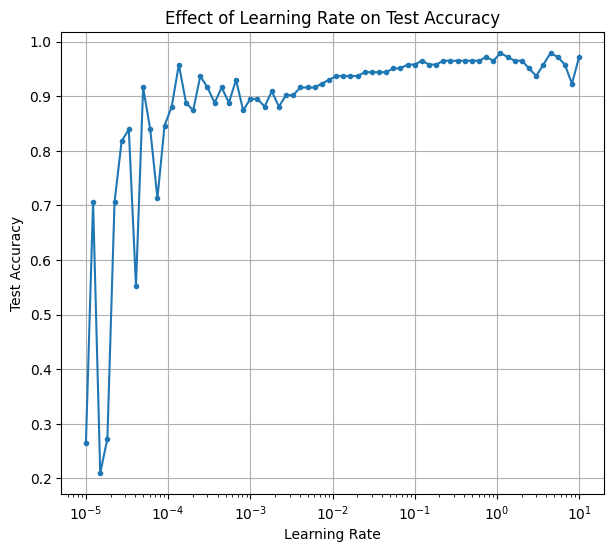

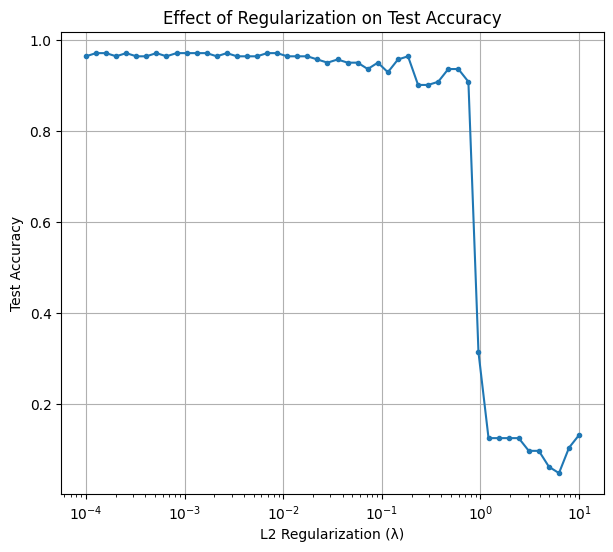


Best regularization term found: 0.000000 (Accuracy: 0.9790)

Best Hyperparameters Found:
Best Learning Rate: 1.1052951411260221
Best Regularization Parameter (Lambda): 0.0
Best Test Accuracy: 0.9790


In [8]:
# Initialize data (assuming X_train, y_train, X_test, y_test are pre-defined)
model = LogisticRegressionSGD(verbose=True)

# Run hyperparameter analysis
best_learning_rate, best_lambda, best_accuracy, best_model = model.analyze_hyperparameters(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

# Print the best results
print("\nBest Hyperparameters Found:")
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Regularization Parameter (Lambda): {best_lambda}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

### Adding momentum

From the analysis of the implementation of the momentum parameter (put equal to 0.9), we didn't notice any particular benefit. For this reason, we will keep it equal to 0 by default, as already done in the above analysis.

In [9]:
# The difference with the class above is that here we DO NOT save the generated plots as PDFs.
# The plots we will add in out final paper are the ones generated without momentum.
class LogisticRegressionSGD:
    """
    Logistic Regression classifier using Stochastic Gradient Descent (SGD) optimization.

    This class supports logistic regression with various features such as:
    - Mini-batch SGD with momentum
    - L2 regularization
    - Early stopping with patience
    - Hyperparameter analysis for tuning learning rate and regularization parameters

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The initial learning rate for gradient descent updates.
    num_iterations : int, default=1000
        The maximum number of training epochs.
    batch_size : int, default=32
        The number of samples per mini-batch.
    momentum : float, default=0.0
        The momentum factor for SGD updates.
    l2_lambda : float, default=0.0
        L2 regularization strength.
    patience : int, default=10
        Number of epochs with no improvement after which training will be stopped early.
    tol : float, default=1e-4
        Minimum improvement threshold for early stopping.
    verbose : bool, default=False
        If True, print training progress and debug information.

    Methods:
    --------
    - sigmoid(z): Computes the sigmoid function.
    - compute_loss(X, y): Computes the loss with L2 regularization.
    - SGDfit(X, y): Fits the model using SGD.
    - predict(X): Predicts class labels for samples in X.
    - plot_loss_history(): Plots the training loss history over epochs.
    - analyze_hyperparameters(X_train, y_train, X_test, y_test, learning_rates, regularization_terms, num_iterations):
      Tunes learning rate and regularization parameters, finding optimal settings based on test accuracy.
    """
    def __init__(self, learning_rate=0.01, num_iterations=1000, batch_size=32, momentum=0.9, l2_lambda=0.0, patience=10, tol=1e-4, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.batch_size = batch_size
        self.momentum = momentum
        self.l2_lambda = l2_lambda
        self.patience = patience  # Early stopping patience
        self.tol = tol  # Minimum improvement threshold for early stopping
        self.beta = None # Vector of weights for the logistic regression model
        self.verbose = verbose
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        y_pred = self.sigmoid(X @ self.beta)
        # Clip y_pred to avoid log(0) issues
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        if self.l2_lambda > 0:
            loss += (self.l2_lambda / 2) * np.sum(self.beta ** 2)
        return loss

    def SGDfit(self, X, y):
        samples, features = X.shape
        self.beta = np.random.randn(features, 1) * 0.01  # Small initialization
        velocity = np.zeros((features, 1))

        # Initialize best_loss to infinity to ensure any first epoch loss will be smaller, allowing it to update.
        best_loss = float('inf')  
        patience_counter = 0

        for epoch in range(self.num_iterations):
            # Shuffle data
            shuffled_indices = np.random.permutation(samples)
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices].reshape(-1, 1)

            # Loop over mini-batches
            for i in range(0, samples, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                # Compute predictions
                y_predicted = self.sigmoid(X_batch @ self.beta)

                # Compute the gradient with L2 regularization
                gradient = (X_batch.T @ (y_predicted - y_batch)) / self.batch_size
                if self.l2_lambda > 0:
                    gradient += self.l2_lambda * self.beta

                # Update velocity and beta with momentum
                velocity = self.momentum * velocity + self.learning_rate * gradient
                self.beta -= velocity

            # Calculate and check loss for early stopping
            current_loss = self.compute_loss(X, y)
            self.loss_history.append(current_loss)  # Track loss over epochs

            # Print loss every 100 epochs if verbose is True
            if self.verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}: Training Loss = {current_loss:.4f}")

            if current_loss < best_loss - self.tol:
                best_loss = current_loss
                patience_counter = 0  # Reset counter if improvement
            else:
                patience_counter += 1  # Increment counter if no significant improvement

            if patience_counter >= self.patience:
                print(f"Stopping early at epoch {epoch + 1}")
                break

    def predict(self, X):
        linear_model = X @ self.beta
        y_predicted = self.sigmoid(linear_model)
        return [1 if i >= 0.5 else 0 for i in y_predicted]

    def plot_loss_history(self):
        plt.plot(self.loss_history)
        plt.xlabel('Epochs')
        plt.ylabel('Training Loss')
        plt.title('Training Loss over Epochs')
        plt.show()

    def analyze_hyperparameters(
    self,
    X_train,
    y_train,
    X_test,
    y_test,
    learning_rates=None,
    regularization_terms=None,
    num_iterations=5000
):
        """
        Perform grid search to optimize learning rate and regularization parameters.

        This function identifies the best learning rate based on test accuracy, 
        then finds the optimal regularization parameter with the chosen learning rate.

        Parameters:
        -----------
        X_train, y_train : np.ndarray
            Training data and labels.
        X_test, y_test : np.ndarray
            Test data and labels.
        learning_rates : array-like, optional
            Array of learning rates to test. Defaults to values between 10^-5 and 10^1.
        regularization_terms : array-like, optional
            Array of regularization terms (λ values) to test. Defaults to values between 10^-4 and 10^1.
        num_iterations : int, optional
            Number of iterations for each model training, default is 5000.
            
        Returns:
        --------
        tuple : (best_learning_rate, best_lambda, best_accuracy, best_model)
            - best_learning_rate (float): The optimal learning rate based on highest test accuracy.
            - best_lambda (float): The optimal regularization term (λ) based on highest test accuracy.
            - best_accuracy (float): The highest test accuracy achieved with the optimal parameters.
            - best_model (LogisticRegressionSGD): The model instance trained with the best parameters.
        """

        # Scale the training and test data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Default values if none provided
        if learning_rates is None:
            learning_rates = np.logspace(-5, 1, 70)
        if regularization_terms is None:
            regularization_terms = np.logspace(-4, 1, 50)
        
        # Step 1: Find the best learning rate
        lr_accuracies = []
        best_learning_rate = None
        best_accuracy = 0
        best_model = None
        
        print("Analyzing learning rates...")
        for lr in learning_rates:
            model = LogisticRegressionSGD(
                learning_rate=lr,
                num_iterations=num_iterations,
                batch_size=self.batch_size,
                momentum=self.momentum,
                l2_lambda=0.01,  # Small regularization during LR search
                patience=self.patience,
                tol=self.tol
            )
            model.SGDfit(X_train, y_train)
            
            predictions = model.predict(X_test)
            accuracy = np.mean(predictions == y_test)
            lr_accuracies.append(accuracy)
            
            # Track best model and learning rate based on accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_learning_rate = lr
                best_model = model
            
            if self.verbose:
                print(f"Learning rate: {lr:.6f}, Test accuracy: {accuracy:.4f}")
        
        print(f'\nBest learning rate found: {best_learning_rate:.6f} '
            f'(Accuracy: {best_accuracy:.4f})')
        print('-' * 60)
        
        # Step 2: Analyze regularization with best learning rate
        reg_accuracies = []
        reg_best_accuracy = best_accuracy
        reg_best_lambda = 0.0
        
        print("\nAnalyzing regularization terms...")
        for reg in regularization_terms:
            model = LogisticRegressionSGD(
                learning_rate=best_learning_rate,
                num_iterations=num_iterations,
                batch_size=self.batch_size,
                momentum=self.momentum,
                l2_lambda=reg,
                patience=self.patience,
                tol=self.tol
            )
            model.SGDfit(X_train, y_train)
            
            predictions = model.predict(X_test)
            accuracy = np.mean(predictions == y_test)
            reg_accuracies.append(accuracy)
            
            # Track best model and lambda based on accuracy
            if accuracy > reg_best_accuracy:
                reg_best_accuracy = accuracy
                reg_best_lambda = reg
                best_model = model  # Update best model with best regularization
            
            if self.verbose:
                print(f"Lambda: {reg:.6f}, Test accuracy: {accuracy:.4f}")
        
        print(f'\nBest regularization term found: {reg_best_lambda:.6f} '
            f'(Accuracy: {reg_best_accuracy:.4f})')
        
        # Plot both learning rate and regularization analyses in a single figure
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot learning rate analysis
        ax1.plot(learning_rates, lr_accuracies, marker='o', markersize=3)
        ax1.set_xscale('log')
        ax1.set_xlabel('Learning Rate')
        ax1.set_ylabel('Test Accuracy')
        ax1.set_title('Learning Rate vs Test Accuracy')
        ax1.grid(True)

        # Plot regularization analysis
        ax2.plot(regularization_terms, reg_accuracies, marker='o', markersize=3)
        ax2.set_xscale('log')
        ax2.set_xlabel('L2 Regularization (λ)')
        ax2.set_ylabel('Test Accuracy')
        ax2.set_title(f'Regularization vs Test Accuracy')
        ax2.grid(True)

        plt.tight_layout()
        plt.show()
        
        return best_learning_rate, reg_best_lambda, reg_best_accuracy, best_model

Analyzing learning rates...
Stopping early at epoch 11
Learning rate: 0.000010, Test accuracy: 0.9091
Stopping early at epoch 18
Learning rate: 0.000012, Test accuracy: 0.8252
Stopping early at epoch 11
Learning rate: 0.000015, Test accuracy: 0.8671
Stopping early at epoch 11
Learning rate: 0.000018, Test accuracy: 0.9161
Stopping early at epoch 11
Learning rate: 0.000022, Test accuracy: 0.9021
Stopping early at epoch 11
Learning rate: 0.000027, Test accuracy: 0.8951
Stopping early at epoch 13
Learning rate: 0.000033, Test accuracy: 0.9161
Stopping early at epoch 11
Learning rate: 0.000041, Test accuracy: 0.9161
Stopping early at epoch 11
Learning rate: 0.000050, Test accuracy: 0.9161
Stopping early at epoch 11
Learning rate: 0.000061, Test accuracy: 0.8811
Stopping early at epoch 11
Learning rate: 0.000074, Test accuracy: 0.8741
Stopping early at epoch 11
Learning rate: 0.000090, Test accuracy: 0.9091
Stopping early at epoch 11
Learning rate: 0.000111, Test accuracy: 0.8741
Stopping e

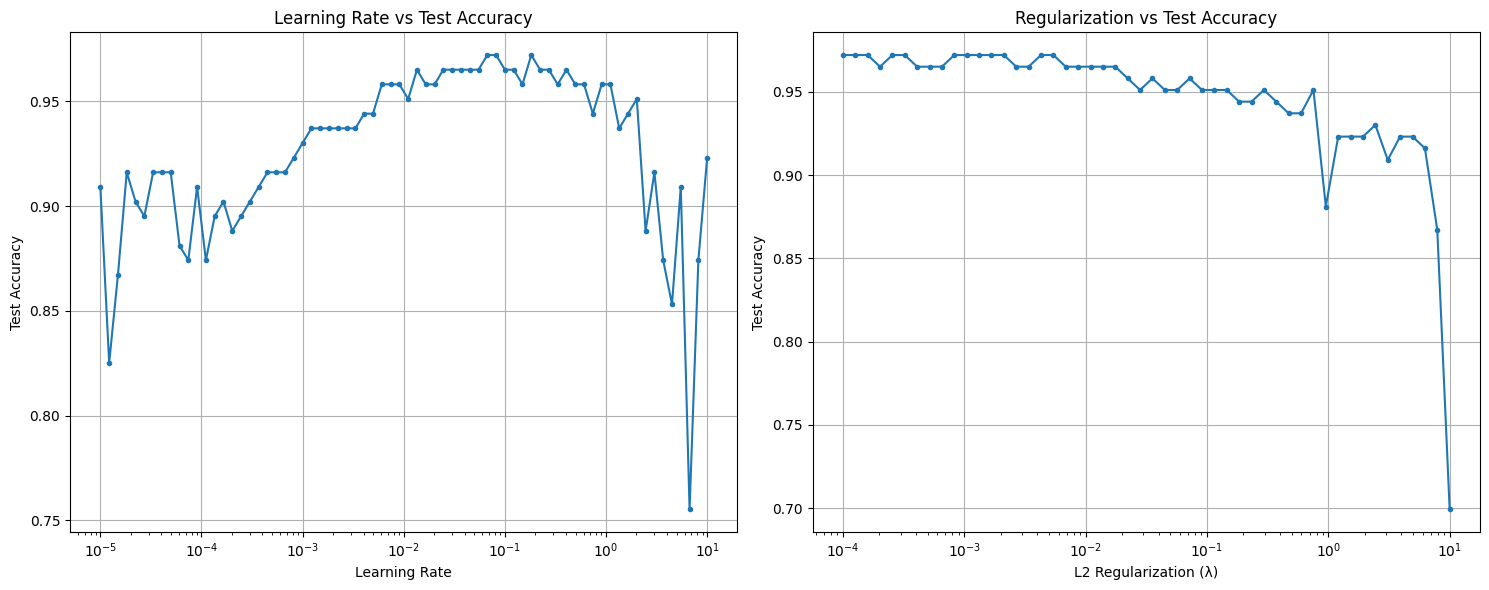


Best Hyperparameters Found:
Best Learning Rate: 0.0670018750350959
Best Regularization Parameter (Lambda): 0.0
Best Test Accuracy: 0.9720


In [10]:
# Initialize data (assuming X_train, y_train, X_test, y_test are pre-defined)
model = LogisticRegressionSGD(verbose=True)

# Run hyperparameter analysis
best_learning_rate, best_lambda, best_accuracy, best_model = model.analyze_hyperparameters(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

# Print the best results
print("\nBest Hyperparameters Found:")
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Regularization Parameter (Lambda): {best_lambda}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")